In [1]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

#other computational libraries
import numpy as np
import pandas as pd
import scipy
import scipy.constants as co
import scipy.stats as ss
import itertools
import pickle

In [2]:
coinhist = pd.read_csv("data/NaICoin_HE_Gamma7.6-11.2_105hrs.txt", skiprows=1, engine='python', names=['Energy','Counts'], \
                         delim_whitespace=False)
print (coinhist.head(10))

   Energy   Counts
0  0.0550  35.0568
1  0.0644  11.0469
2  0.0748  14.0187
3  0.0862  11.0453
4  0.0945   6.0141
5  0.1038   2.9646
6  0.1142   6.9273
7  0.1246   5.0972
8  0.1340   8.0691
9  0.1433   7.0013


In [3]:
coinE = np.asarray(coinhist['Energy'],dtype=float)
coinN = np.asarray(coinhist['Counts'],dtype=float)



print(np.shape(coinE))
print(np.shape(coinN))

coinN = np.round(coinN)
coinN = np.asarray(coinN,dtype=int)
print(coinN)

(95,)
(95,)
[35 11 14 11  6  3  7  5  8  7  9  7  6  3  3  4  2  0  1  6  4  7  3  2
  1  2  2  0  0  2  0  1  3  0  2  0  0  0  1  3  0  0  2  1  0  2  0  0
  0  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  1  0  1  0  1  1  0  0  0  0  0  1  0  1  1  0  0  1]


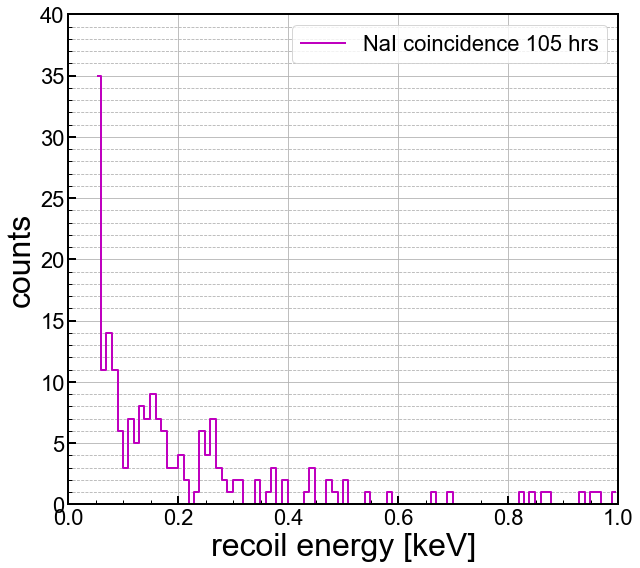

In [4]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.step(coinE,coinN, where='mid',color='m', linestyle='-', \
            label='NaI coincidence {} hrs'.format(105), linewidth=2)

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 40


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [5]:
#get mass of silicon nucleus
# double delnuc = getDelta(isotope);
#  double deln = 8.071;
#  double melec = 0.510998;
#  double mnbar = 931.494045;
#  double mnuc = (getN(isotope)+getZ(isotope))*mnbar + delnuc -getZ(isotope)*melec;

#deltas
# else if(isotope=="28Si")
#    return -21.493;
#  else if(isotope=="29Si")
#    return -21.895;
#  else if(isotope=="30Si")
#    return -24.433;
# else if(isotope=="32Si")
#    return -24.081;
    
del29Si = -21.895
melec = 0.510998
mnbar = 931.494045
m29Si = (15+14)*mnbar + del29Si -14*melec
print(m29Si)

del30Si = -24.433
m30Si = (16+14)*mnbar + del30Si -14*melec
#gammas neutron separation energies
#  else if(isotope=="28Si")
#    return 17.17972;
#  else if(isotope=="29Si")
#    return 8.47356;
#  else if(isotope=="30Si")
#    return 10.60924;
#  else if(isotope=="31Si")
#    return 6.58740;
#  else if(isotope=="32Si")
#    return 9.2000;
#  else if(isotope=="33Si")
#    return 4.5080;

Sn29Si = 8.47356
Sn30Si = 10.60924

26984.278333000002


In [6]:
#E = pow((Sn-(Elev[0]/1000.0)),2.0)/(2*(getMass(isoname)+(Elev[0]/1000.0)));
E29Si = (Sn29Si**2/(2*m29Si))*(1000)
print(E29Si)
E30Si = (Sn30Si**2/(2*m30Si))*(1000)
print(E30Si)

1.3304268913093709
2.016175765469725


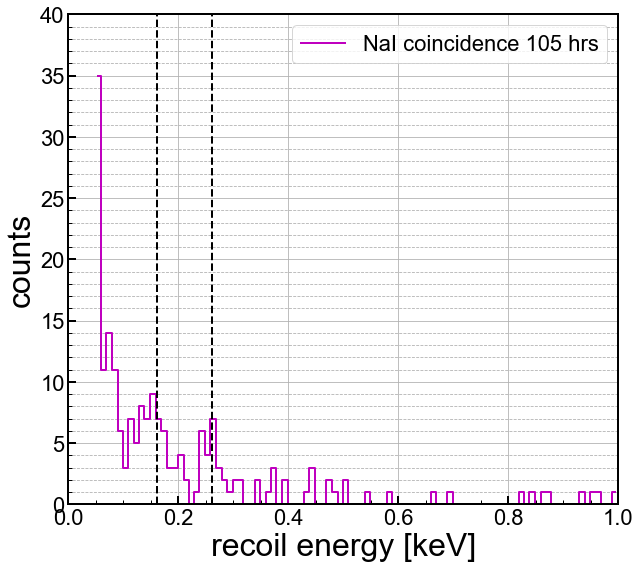

In [7]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes


ax1.step(coinE,coinN, where='mid',color='m', linestyle='-', \
            label='NaI coincidence {} hrs'.format(105), linewidth=2)

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 40


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

plt.axvline(x=E29Si*0.122,color='k',linestyle="--")
plt.axvline(x=E30Si*0.13,color='k',linestyle="--")

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [8]:

param = [0.11,0.03,0.13,0.01,0.75,0.2,0.1,0.003412,0.05]
def prob_func(E,theta):
    
  y1,w1,y2,w2,fexp,fg,flat,rg,Escale = theta
  #deltas for masses
  prob_Sn29Si = 8.47356
  prob_Sn30Si = 10.60924
    
  prob_del29Si = -21.895
  prob_melec = 0.510998
  prob_mnbar = 931.494045
  prob_m29Si = (15+14)*prob_mnbar + prob_del29Si -14*prob_melec


  prob_del30Si = -24.433
  prob_m30Si = (16+14)*prob_mnbar + prob_del30Si -14*prob_melec
    
  prob_E29Si = (prob_Sn29Si**2/(2*prob_m29Si))*(1000)

  prob_E30Si = (prob_Sn30Si**2/(2*prob_m30Si))*(1000)
    
  #Escale = 0.05 # 100 eV  
  expdecay = (1/Escale)*np.exp(-(E/Escale))
    
  #energy per charge pair in Si
  eps=3.8 #eV/pair

  #w1 =0.02 #width of first gaussian
  #f1 = 0.009 #Fano factor of first gaussian
  #y1 = 0.122
  mu1 = prob_E29Si*y1
  #w1 = np.sqrt(f1*(mu1/eps))
  #if(w1==0.0):
  #  w1=1e-6
  g1 = (1/(w1*np.sqrt(2*np.pi)))*np.exp(-(E-mu1)**2/(2*w1**2))
    
  #w2 =0.01 #width of first gaussian
  #f2 = 0.002
  #y2 = 0.13
  mu2 = prob_E30Si*y2
  #w2 = np.sqrt(f2*(mu2/eps))
  #if(w2==0.0):
  #  w2=1e-6
  g2 = (1/(w2*np.sqrt(2*np.pi)))*np.exp(-(E-mu2)**2/(2*w2**2))
    
  #print(w1,w2)
    
  #flat=0.01
  #flat = 1-fexp-fg
  #print(flat+fexp+fg)

  #relprob of gammas
  p1=0.020846
  p2=rg
  psum=p1+p2
    
  #return 0.75*expdecay+0.2*((p1/psum)*g1+(p2/psum)*g2)+flat
  return (fexp*expdecay+fg*((p1/psum)*g1+(p2/psum)*g2)+flat)*0.00999

a = np.asarray([0.1,0.2])
print(np.sum(coinN)*prob_func(a,param))
print(coinE)
print(np.mean(np.diff(coinE)))

[5.58396241 1.65465571]
[0.055  0.0644 0.0748 0.0862 0.0945 0.1038 0.1142 0.1246 0.134  0.1433
 0.1547 0.1641 0.1745 0.1848 0.1931 0.2056 0.215  0.2253 0.2326 0.244
 0.2534 0.2627 0.2741 0.2845 0.2939 0.3053 0.3136 0.3229 0.3344 0.3437
 0.3541 0.3645 0.3738 0.3832 0.3946 0.405  0.4154 0.4258 0.433  0.4444
 0.4548 0.4652 0.4735 0.4849 0.4953 0.5036 0.513  0.5234 0.5348 0.5431
 0.5535 0.5638 0.5742 0.5836 0.5939 0.6033 0.6137 0.624  0.6345 0.6449
 0.6542 0.6636 0.6719 0.6843 0.6937 0.704  0.7144 0.7248 0.7342 0.7445
 0.756  0.7664 0.7767 0.7861 0.7965 0.8069 0.8152 0.8235 0.8338 0.8432
 0.8546 0.865  0.8733 0.8837 0.8941 0.9034 0.9138 0.9242 0.9335 0.9439
 0.9533 0.9626 0.9729 0.9834 0.9938]
0.009987234042553193


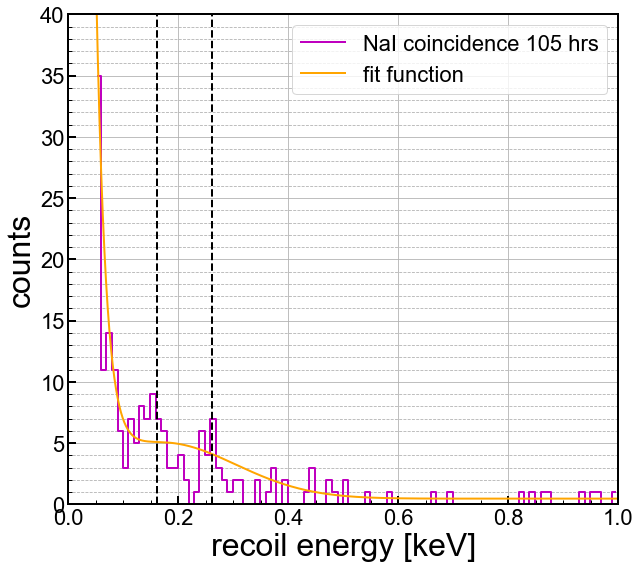

In [54]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes
param = [0.11,0.03,0.13,0.02,6.0,0.6,0.1,0.003412,0.02]
#param = [0.1122901,0.12,0.12932049,0.12,5.94833417,0.75,0.23406076,0.0074096,0.01814207]

evecplot = np.linspace(0.0,1,num=1000)

ax1.step(coinE,coinN, where='mid',color='m', linestyle='-', \
            label='NaI coincidence {} hrs'.format(105), linewidth=2)
ax1.plot (evecplot, np.sum(coinN)*prob_func(evecplot,param), color='orange',linestyle='-', label='fit function')

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 40


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

plt.axvline(x=E29Si*0.122,color='k',linestyle="--")
plt.axvline(x=E30Si*0.13,color='k',linestyle="--")

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [10]:
#set up some fitting
import emcee
import corner
from scipy.optimize import minimize

In [11]:
print(coinN)

[35 11 14 11  6  3  7  5  8  7  9  7  6  3  3  4  2  0  1  6  4  7  3  2
  1  2  2  0  0  2  0  1  3  0  2  0  0  0  1  3  0  0  2  1  0  2  0  0
  0  1  0  0  0  1  0  0  0  0  0  0  0  1  0  0  1  0  0  0  0  0  0  0
  0  0  0  0  0  1  0  1  0  1  1  0  0  0  0  0  1  0  1  1  0  0  1]


In [12]:
def log_likelihood_func(theta, evec, nvec): 
    
    y1,w1,y2,w2,fexp,fg,flat,rg,Escale = theta
    
    
    #initialize array of lambdas for each bin according to our model
    lam_array = np.zeros(np.shape(evec))
    for i in range(len(nvec)):
        result = (np.sum(nvec))*prob_func(evec[i],theta)
        #print(prob_func(evec[i],theta))
        #print(evec[i])
        lam_array[i]=result
    
    #Sterling's approximation array
    sterling_array = np.zeros(np.shape(evec))
    for i in range(len(nvec)):
        if nvec[i]>12:
                sterling_array[i]=nvec[i]*np.log(nvec[i])-nvec[i]
        else:
                sterling_array[i]=np.log(np.math.factorial(nvec[i]))
    
    model = 0

    for i in range(len(nvec)):
      #print(lam_array[i])
      model +=(-lam_array[i] + nvec[i]*np.log(lam_array[i])-sterling_array[i])
    return model

In [13]:
print(log_likelihood_func(param,coinE,coinN))

-132.61364358147466


In [19]:
#fit
nll = lambda *args: -log_likelihood_func(*args)
#initial = np.array([0.122,0.02,0.13,0.01,0.75,0.2,0.05]) 
initial = np.array([0.11,0.03,0.13,0.02,6.0,0.6,0.1,0.003412,0.02])
#soln = scipy.optimize.minimize(nll, initial,method='Powell', args=(coinE, coinN), bounds=[(0.09,0.15), \
#    (1e-4,0.05),(0.05,0.2),(1e-4,0.02),(0.01,10),(0.01,10),(0.01,10),(0.000001,0.5),(0.001,10)])
soln = scipy.optimize.minimize(nll, initial, args=(coinE, coinN), bounds=[(0.09,0.15), \
    (1e-4,0.05),(0.05,0.2),(1e-4,0.02),(0.01,10),(0.01,10),(0.01,10),(0.000001,0.5),(0.001,10)])
y1ml,w1ml,y2ml,w2ml,fexpml,fgml,flatml,rgml,Escaleml = soln.x
print(soln.x)
print(soln)

[0.1122901  0.03365199 0.12932049 0.01551824 5.94833417 0.40676502
 0.23406076 0.0074096  0.01814207]
      fun: 110.47063393895463
 hess_inv: <9x9 LbfgsInvHessProduct with dtype=float64>
      jac: array([ 0.00535749,  0.01064961, -0.12023804, -0.03059597,  0.10703047,
       -0.01296883,  0.02330154, -0.02451088,  0.9998729 ])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 800
      nit: 58
     njev: 80
   status: 0
  success: True
        x: array([0.1122901 , 0.03365199, 0.12932049, 0.01551824, 5.94833417,
       0.40676502, 0.23406076, 0.0074096 , 0.01814207])


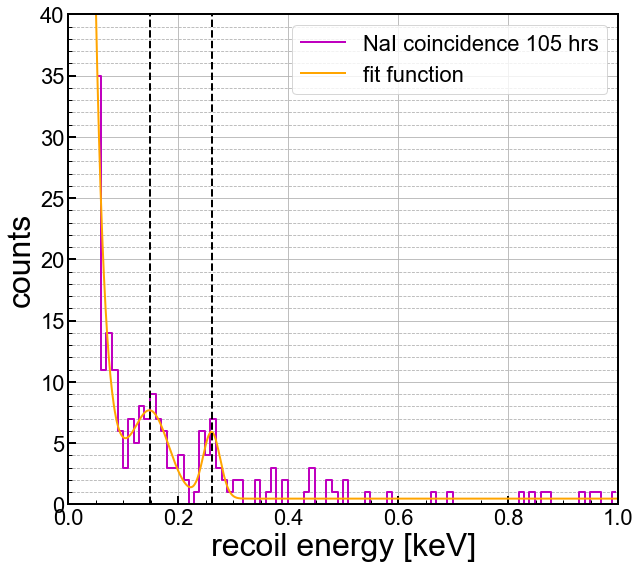

-110.47063393895463


In [21]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

evecplot = np.linspace(0.0,1,num=1000)

ax1.step(coinE,coinN, where='mid',color='m', linestyle='-', \
            label='NaI coincidence {} hrs'.format(105), linewidth=2)
ax1.plot (evecplot, np.sum(coinN)*prob_func(evecplot,soln.x), color='orange',linestyle='-', label='fit function')

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 40


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 1) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

plt.axvline(x=E29Si*soln.x[0],color='k',linestyle="--")
plt.axvline(x=E30Si*soln.x[2],color='k',linestyle="--")

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()
print(log_likelihood_func(soln.x,coinE,coinN))

In [75]:
def prior(theta): #this sets the prior conditions of our parameters
    y1,w1,y2,w2,fexp,fg,flat,rg,Escale = theta
    if y1>=0.06 and y1<0.2 and w1>=0 and w1<0.05 and y2>=0.06 and y2<0.4 and w2>=0 and w2<0.032 and fexp>=4 and fg>=0 and \
      flat>=0 and rg>=0.004 and rg<0.02 and Escale>=0.016 and Escale<0.050:
        return 0.0
    return -np.inf

def prob(theta, evec, nvec):
    lp = prior(theta)
    if not np.isfinite(lp):
        return -np.inf 
    result = lp + log_likelihood_func(theta, evec, nvec)
    if np.isnan(np.asarray([result])):
        return -np.inf
    return result

In [76]:
pos = soln.x + 1e-7 * np.random.randn(32, 9)
nwalkers, ndim = pos.shape

sampler = emcee.EnsembleSampler(
    nwalkers, ndim, prob, args=(coinE,coinN)
)

sampler.run_mcmc(pos, 10000, progress=True);

100%|██████████| 10000/10000 [03:55<00:00, 42.44it/s]


(21120, 9)


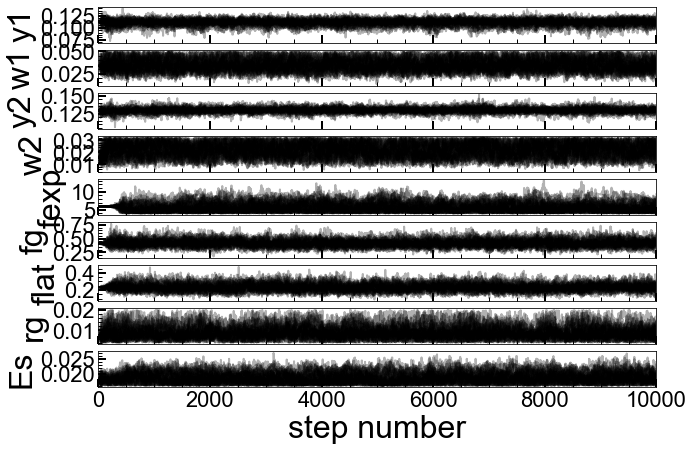

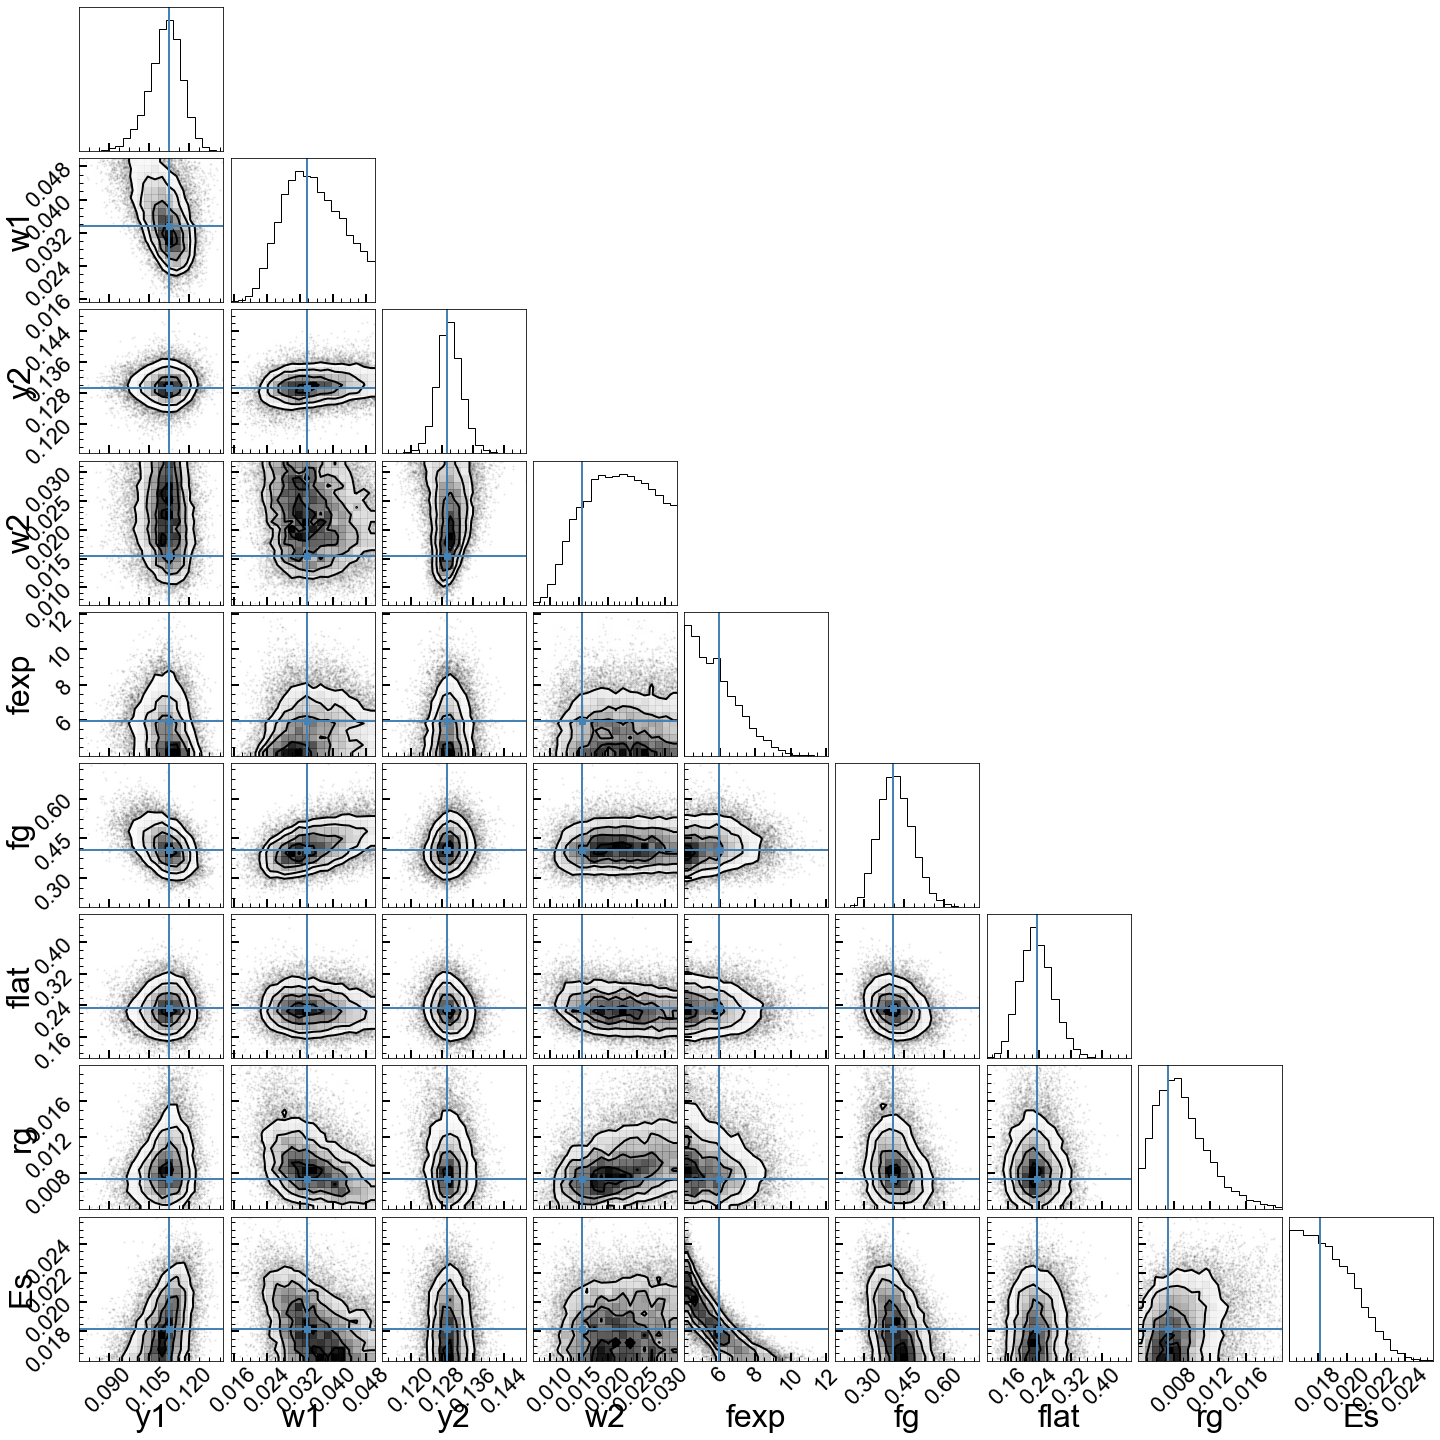

In [77]:
fig, axes = plt.subplots(9, figsize=(10, 7), sharex=True)
samples = sampler.get_chain()
labels = ["y1","w1","y2","w2","fexp","fg","flat","rg","Es"]
for i in range(ndim):
    ax = axes[i]
    ax.plot(samples[:, :, i], "k", alpha=0.3)
    ax.set_xlim(0, len(samples))
    ax.set_ylabel(labels[i])
    #ax.yaxis.set_label_coords(-0.1, 0.5)

axes[-1].set_xlabel("step number");

#tau = sampler.get_autocorr_time()
#print(tau)

flat_samples = sampler.get_chain(discard=100, thin=15, flat=True)
print(flat_samples.shape)

fig = corner.corner(
    flat_samples, labels=labels, truths=[y1ml,w1ml,y2ml,w2ml,fexpml,fgml,flatml,rgml,Escaleml]
);

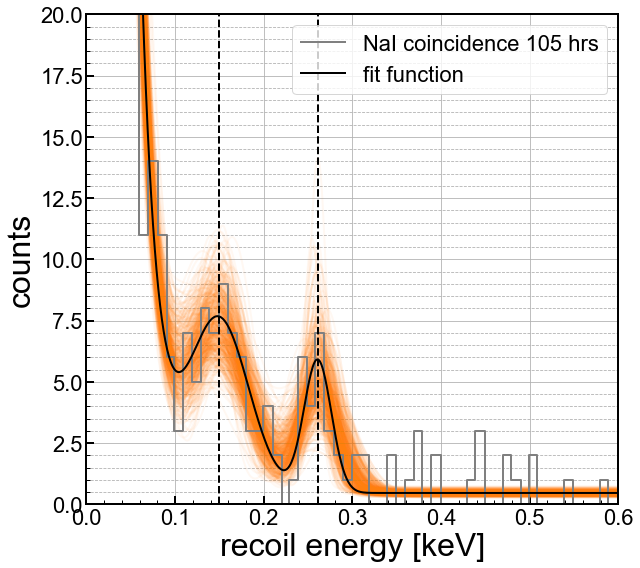

In [110]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

evecplot = np.linspace(0.0,1,num=1000)

blue = '#118DFA'
sampsize=500

inds = np.random.randint(len(flat_samples), size=sampsize)
for ind in inds:
    sample = flat_samples[ind]
    ax1.plot(evecplot, np.sum(coinN)*prob_func(evecplot,sample), color="C1", alpha=0.05)



ax1.step(coinE,coinN, where='mid',color='gray', linestyle='-', \
            label='NaI coincidence {} hrs'.format(105), linewidth=2)
ax1.plot (evecplot, np.sum(coinN)*prob_func(evecplot,soln.x), color='k',linestyle='-', label='fit function')

#ax1.plot(Eplot, 100*er_res(Eplot),color='b',label="$\sigma$ (n,p) (%)")


ymin = 0
ymax = 20


ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0.0, 0.6) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [keV]')
ax1.set_ylabel('counts')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

plt.axvline(x=E29Si*soln.x[0],color='k',linestyle="--")
plt.axvline(x=E30Si*soln.x[2],color='k',linestyle="--")

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('paper_figures/hist.eps')
#plt.savefig('paper_figures/hist.pdf')
plt.show()

In [95]:
print(np.shape(flat_samples))

(21120, 9)


In [105]:
y1_sig = np.sqrt(np.var(flat_samples[:,0]))
y2_sig = np.sqrt(np.var(flat_samples[:,2]))

In [106]:
print(y1ml)
print(y1_sig)
print(y2ml)
print(y2_sig)

0.11229010198242834
0.006269936292582828
0.12932048812660493
0.0033096458164068423
